Pond3_justfull
Pond3_justfull_bigger
Pond3_bigger
Pond5_justfull
Pond5_justfull_bigger
Pond5_bigger


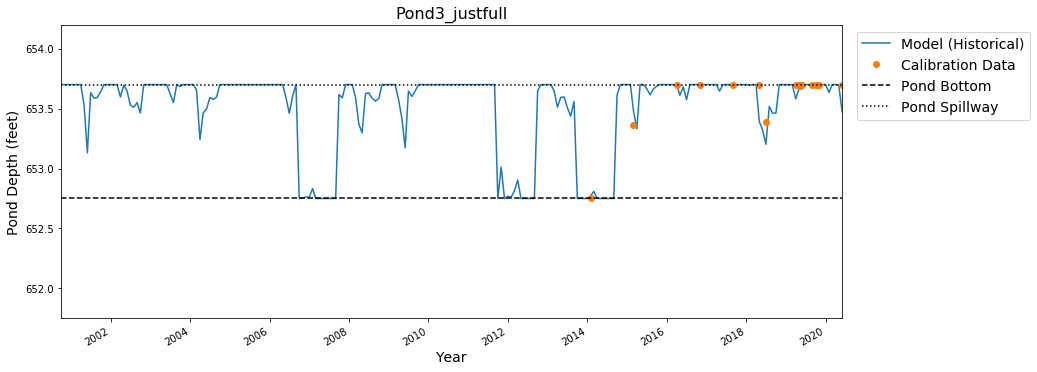

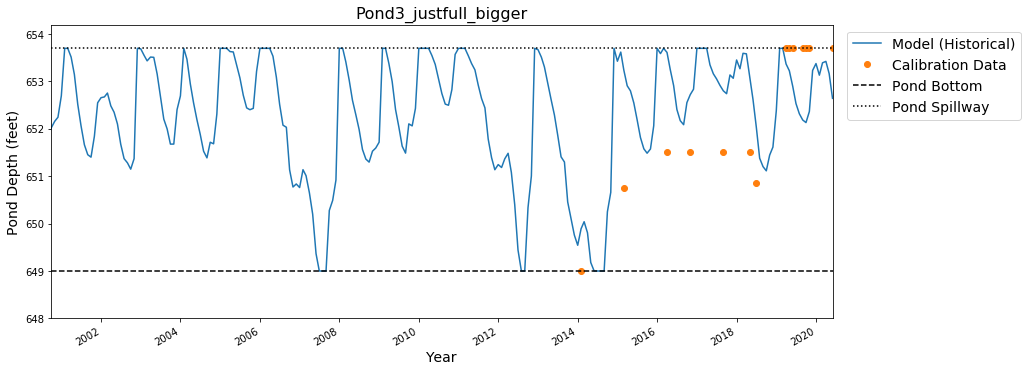

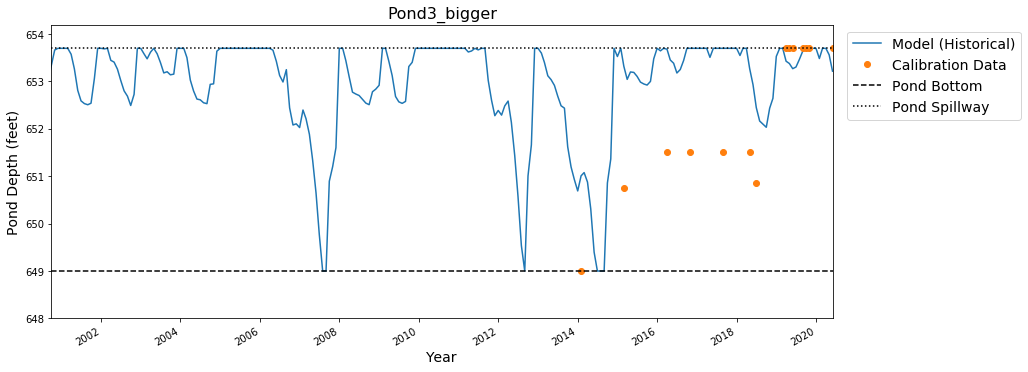

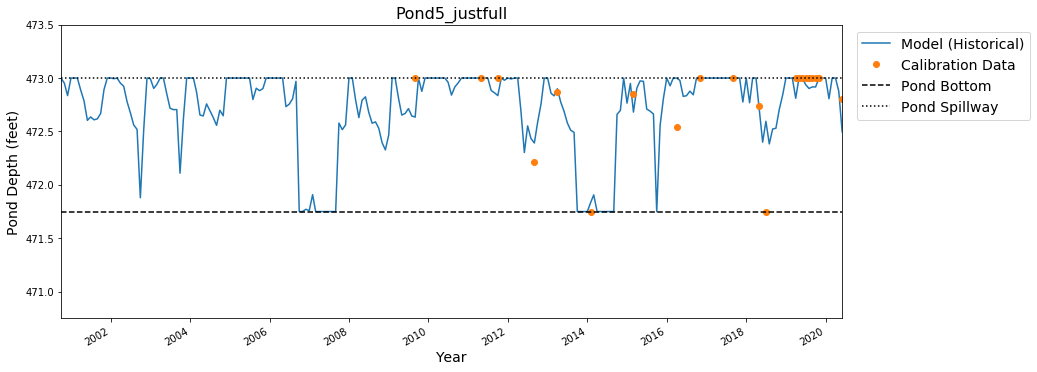

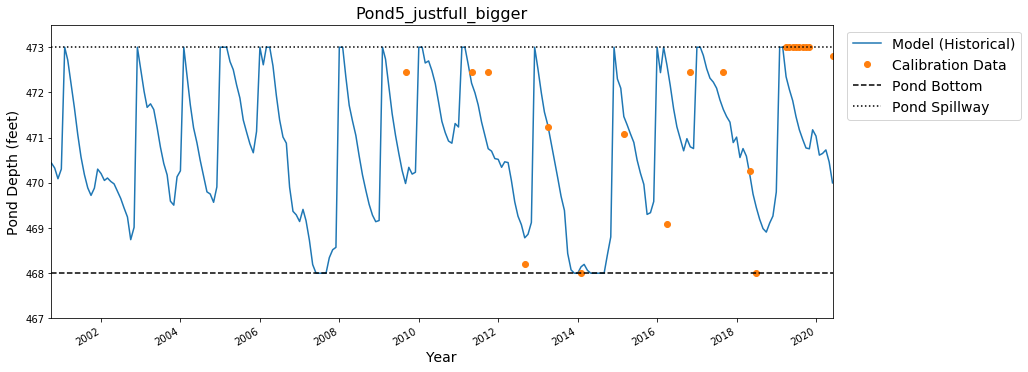

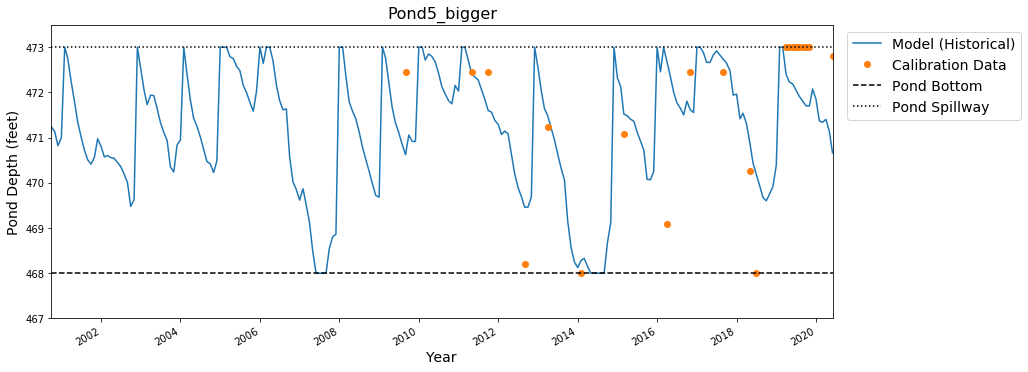

In [1]:



################### user inputs ###############################
repo_folder = './'
plot_calibration_data = 'y' # toggle between 'y' and 'n' to show or not show cablibration data in timeseries plot

## filenames
master_input_filename = 'main_inputs_design_hist'





###############################################################
import os
os.chdir(repo_folder)
import importlib


from pondit.load_data import *
from pondit.calc_ET_proj import *
from pondit.calc_model_proj import *
from pondit.plot_hydroperiod import *
from pondit.plot_model import *


import pandas
import numpy as np
# import matplotlib.pylab as plt
# import scipy.constants
# import scipy.optimize
# import datetime
# import scipy.ndimage.interpolation
# import statsmodels.api as sm
# import calendar

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


%matplotlib inline

folder_in = repo_folder + '/inputs/'
folder_out = repo_folder + '/results/'



### load input data common to all sites
scalars = pandas.read_csv(folder_in + master_input_filename + '.csv', index_col=0)

site_list = scalars.index

site_list = scalars.loc[scalars['status'] != 'done', :].index


for site in site_list:
#     scalars_hist = pandas.read_csv(folder_out + 'data/' + site + '_model_params_hist.csv', index_col=0)
    print(site)
    ##load data hist_model
    stage_storage, soils, data, last_hist_date, calib_data = load_data(scalars, site, folder_in)
    
    sws_calc_dict = {}
    
        
    ## calculate ET, using Blaney Criddle
    bc_calc = calc_ET_proj(data, scalars, site, repo_folder, last_hist_date)

    # calculate model
    sws_calc, out = calc_pondit_proj(bc_calc, scalars, site, stage_storage, soils, repo_folder)
    
    if plot_calibration_data == 'y':
        sws_calc = pandas.merge(sws_calc, calib_data[['calib_wse_ft']], right_index=True, left_on='date', how='outer')
        
    
    sws_calc.to_csv(folder_out + '/data/'+ site + '_data_design_hist.csv')
    plot_model(sws_calc, scalars, site, folder_out) ## figure out how to optionally plot calibration data here
